In [4]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer


In [5]:
#load the csv file

def load_data(file_path):
    # Load the csv file
    df = pd.read_csv(file_path)
    return df

In [6]:
  #Declaring the functions

def explore_data(df):
    # Visualizing the distribution of the 'charges' variable
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x='charges', kde=True, color='blue', bins=20)
    plt.title("Distribution of Medical Charges")
    plt.xlabel("Charges")
    plt.ylabel("Count")
    plt.show()

    # Visualizing the relationship between 'age' and 'charges'
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x='age', y='charges', hue='smoker', palette='Set1', alpha=0.8)
    plt.title("Medical Charges vs. Age")
    plt.xlabel("Age")
    plt.ylabel("Charges")
    plt.show()

    # Visualizing the relationship between 'bmi' and 'charges'
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x='bmi', y='charges', hue='smoker', palette='Set1', alpha=0.8)
    plt.title("Medical Charges vs. BMI")
    plt.xlabel("BMI")
    plt.ylabel("Charges")
    plt.show()

    # Visualizing the impact of 'sex' on 'charges'
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x='sex', y='charges', palette='Set2')
    plt.title("Medical Charges by Gender")
    plt.xlabel("Gender")
    plt.ylabel("Charges")
    plt.show()

    # Visualizing the impact of 'smoker' on 'charges'
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x='smoker', y='charges', palette='Set2')
    plt.title("Medical Charges by Smoking Status")
    plt.xlabel("Smoker")
    plt.ylabel("Charges")
    plt.show()

    # Visualizing the distribution of 'bmi' by 'smoker' status
    plt.figure(figsize=(8, 6))
    sns.violinplot(data=df, x='smoker', y='bmi', palette='Pastel1')
    plt.title("Distribution of BMI by Smoking Status")
    plt.xlabel("Smoker")
    plt.ylabel("BMI")
    plt.show()

def preprocess_data(df):
    # Convert categorical variables to numerical using one-hot encoding
    df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

    # Separate features (X) and target variable (y)
    X = df.drop('charges', axis=1)
    y = df['charges']

    # Feature scaling for continuous variables 'age' and 'bmi'
    scaler = StandardScaler()
    X[['age', 'bmi']] = scaler.fit_transform(X[['age', 'bmi']])

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

def train_models(X_train, y_train):
    # Train the Linear Regression model (without regularization)
    linear_model = LinearRegression()
    linear_model.fit(X_train, y_train)

    # Train the Ridge Regression model (L2 regularization)
    ridge_model = Ridge(alpha=1.0)  # You can adjust alpha as needed
    ridge_model.fit(X_train, y_train)

    # Train the Lasso Regression model (L1 regularization)
    lasso_model = Lasso(alpha=1.0)  # You can adjust alpha as needed
    lasso_model.fit(X_train, y_train)

    return linear_model, ridge_model, lasso_model

def evaluate_models(model, X_test, y_test):
    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Model evaluation
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return y_pred, mse, r2


#Bonus Code adding hyperparameter tuning

def tune_model_hyperparameters(X_train, y_train):
    # Define the hyperparameter grid for Ridge Regression
    ridge_params = {'alpha': [0.01, 0.1, 1.0, 10.0]}

    # Define the hyperparameter grid for Lasso Regression
    lasso_params = {'alpha': [0.01, 0.1, 1.0, 10.0]}

    # Create Ridge and Lasso models
    ridge_model = Ridge()
    lasso_model = Lasso()

    # Perform Grid Search to find the best hyperparameters for Ridge and Lasso models
    ridge_grid_search = GridSearchCV(ridge_model, ridge_params, scoring='neg_mean_squared_error', cv=5)
    ridge_grid_search.fit(X_train, y_train)

    lasso_grid_search = GridSearchCV(lasso_model, lasso_params, scoring='neg_mean_squared_error', cv=5)
    lasso_grid_search.fit(X_train, y_train)

    # Get the best hyperparameters for Ridge and Lasso models
    best_ridge_alpha = ridge_grid_search.best_params_['alpha']
    best_lasso_alpha = lasso_grid_search.best_params_['alpha']

    # Train the models with the best hyperparameters
    ridge_model = Ridge(alpha=best_ridge_alpha)
    lasso_model = Lasso(alpha=best_lasso_alpha)

    ridge_model.fit(X_train, y_train)
    lasso_model.fit(X_train, y_train)

    # Return the models and best hyperparameters
    return ridge_model, lasso_model, best_ridge_alpha, best_lasso_alpha



In [7]:
if __name__ == "__main__":
    # Load the data
    file_path = 'C:/Users/STAFF/Downloads/Medical_costs/insurance.csv'
    df = load_data(file_path)


In [8]:
df.sample(5)

,age,sex,bmi,children,smoker,region,charges
757,47,female,27.830,0,yes,southeast,23065.42070
837,56,female,28.310,0,no,northeast,11657.71890
775,51,male,33.330,3,no,southeast,10560.49170
1238,37,male,22.705,3,no,northeast,6985.50695
858,25,female,32.230,1,no,southeast,18218.16139


In [9]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [10]:
df.shape

(1338, 7)

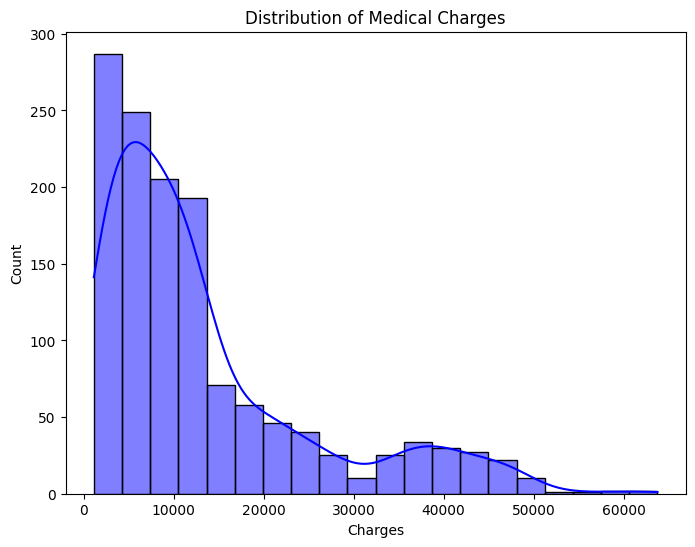

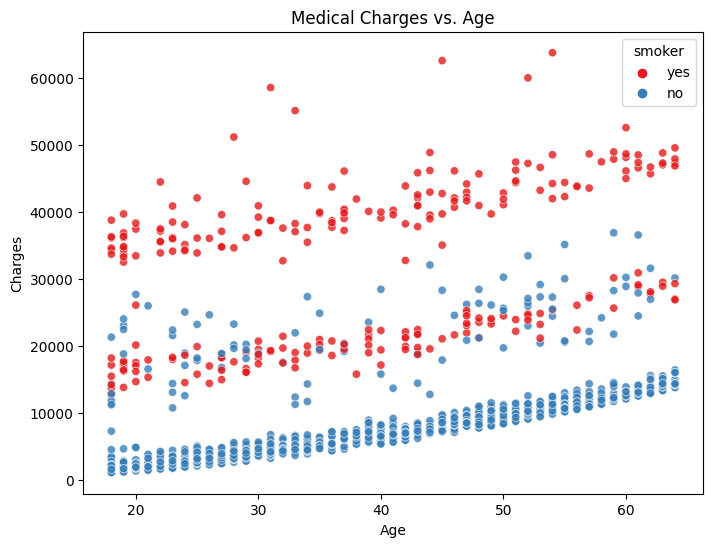

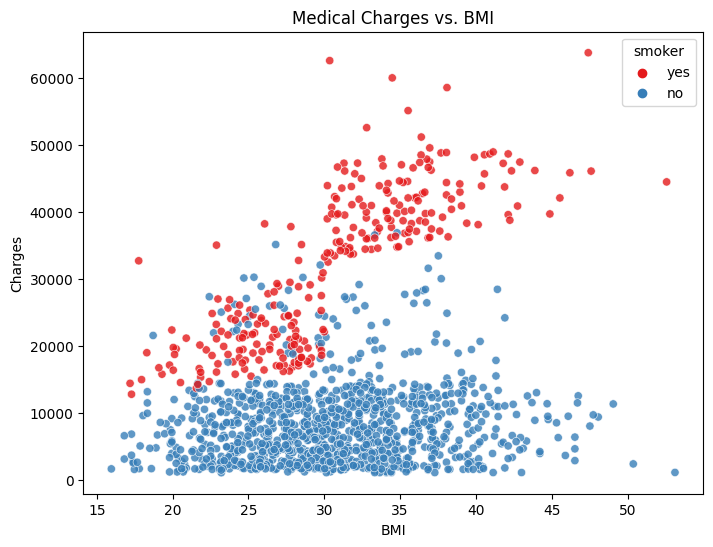

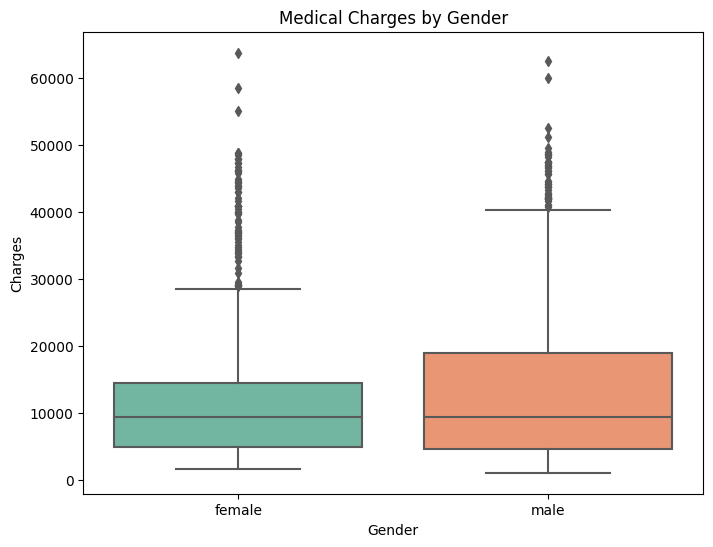

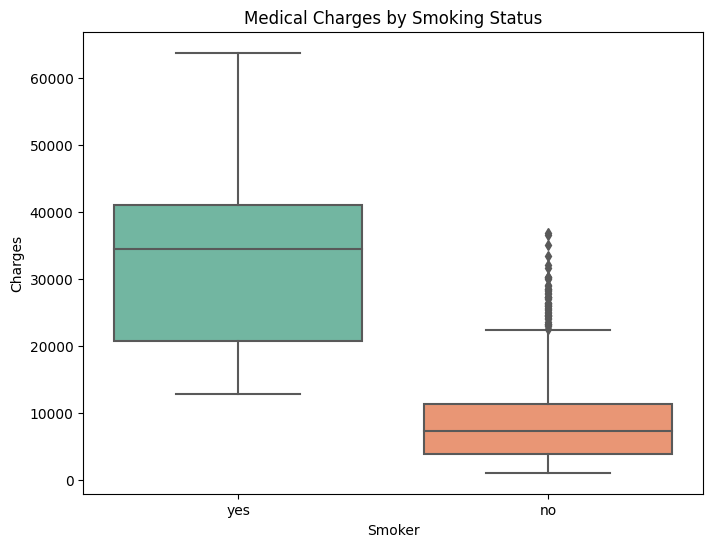

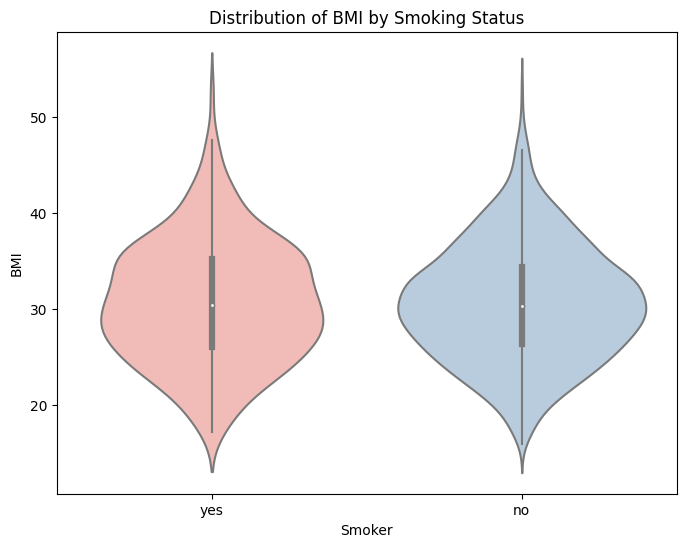

In [11]:
    # Explore the data
    explore_data(df)

In [12]:
    # Preprocess the data
    X_train, X_test, y_train, y_test = preprocess_data(df)


In [13]:
X_train.sample(5)

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
21,-0.655551,0.284880,1,False,False,False,False,True
1146,1.480485,0.350498,0,True,True,False,False,True
720,0.839674,1.639888,0,False,False,False,False,False
1050,0.341265,1.032103,1,False,False,True,False,False
300,-0.228344,-0.510736,3,True,False,False,False,False


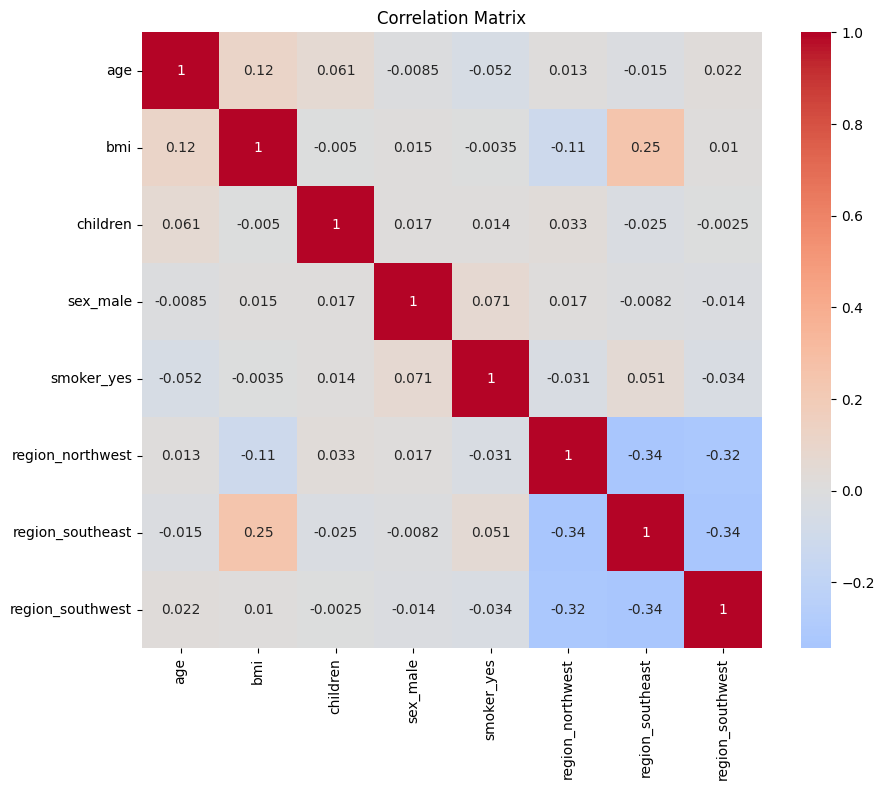

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
# 
# Compute the correlation matrix
# correlation_matrix = X_train.corr()
# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
# plt.title('Correlation Matrix')
# plt.show()

plt.figure(figsize=(10, 8))
correlation_matrix = .corr(method='pearson', min_periods=1)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Matrix")
plt.show()

In [11]:
    # Train the models
    linear_model, ridge_model, lasso_model = train_models(X_train, y_train)


In [12]:
    # Evaluate the models
    y_pred_linear, mse_linear, r2_linear = evaluate_models(linear_model, X_test, y_test)
    y_pred_ridge, mse_ridge, r2_ridge = evaluate_models(ridge_model, X_test, y_test)
    y_pred_lasso, mse_lasso, r2_lasso = evaluate_models(lasso_model, X_test, y_test)


In [13]:
    # Print the evaluation results
    print("Linear Regression:")
    print("Mean Squared Error (MSE):", mse_linear)
    print("R-squared (R2):", r2_linear)
    print()

    print("Ridge Regression:")
    print("Mean Squared Error (MSE):", mse_ridge)
    print("R-squared (R2):", r2_ridge)
    print()

    print("Lasso Regression:")
    print("Mean Squared Error (MSE):", mse_lasso)
    print("R-squared (R2):", r2_lasso)

Linear Regression:
Mean Squared Error (MSE): 33596915.851361476
R-squared (R2): 0.7835929767120722

Ridge Regression:
Mean Squared Error (MSE): 33645306.51760615
R-squared (R2): 0.7832812790525829

Lasso Regression:
Mean Squared Error (MSE): 33605625.91107342
R-squared (R2): 0.7835368728094623


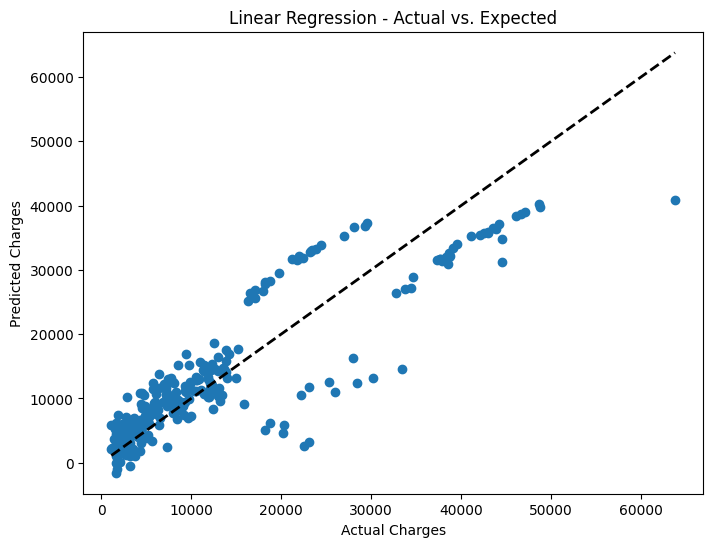

In [14]:
    # Plot actual vs. expected for Linear Regression
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred_linear)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
    plt.xlabel("Actual Charges")
    plt.ylabel("Predicted Charges")
    plt.title("Linear Regression - Actual vs. Expected")
    plt.show()

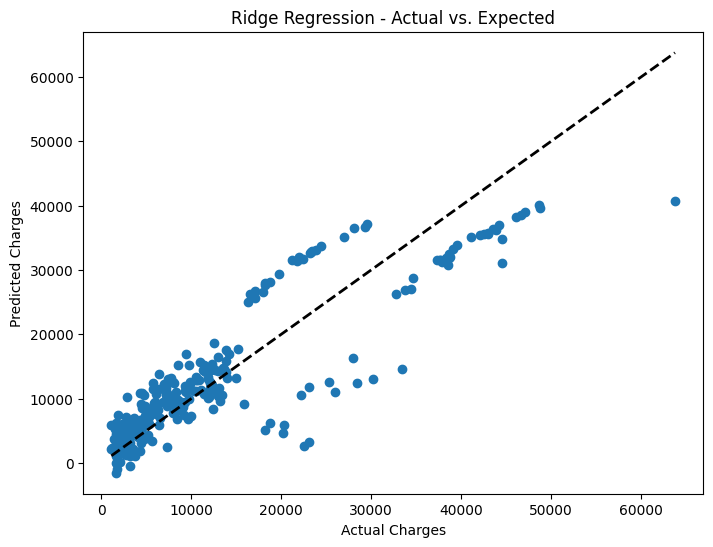

In [15]:
    # Plot actual vs. expected for Ridge Regression
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred_ridge)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
    plt.xlabel("Actual Charges")
    plt.ylabel("Predicted Charges")
    plt.title("Ridge Regression - Actual vs. Expected")
    plt.show()

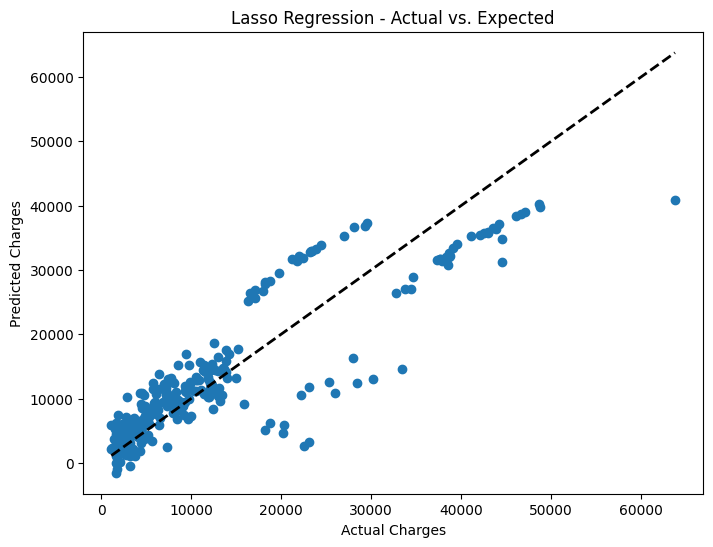

In [16]:
    # Plot actual vs. expected for Lasso Regression
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred_lasso)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
    plt.xlabel("Actual Charges")
    plt.ylabel("Predicted Charges")
    plt.title("Lasso Regression - Actual vs. Expected")
    plt.show()

In [17]:
     #Bonus code adding hyperparameter tuning

     #Train the models with hyperparameter tuning and get the best hyperparameters
     ridge_model,lasso_model,best_ridge_alpha,best_lasso_alpha = tune_model_hyperparameters(X_train,y_train)


In [18]:
    # Evaluate the models (same as before)

    # Print the best hyperparameters
    print("Best Ridge Regression Alpha:", best_ridge_alpha)
    print("Best Lasso Regression Alpha:", best_lasso_alpha)

Best Ridge Regression Alpha: 1.0
Best Lasso Regression Alpha: 10.0
